In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#### The dataset contains several parameters which are considered important during the application for Masters Programs.

#### GRE Scores(out of 340 )

#### TOEFL Scores ( out of 120 )

#### University Rating ( out of 5, 5 is the best )

#### Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

#### Undergraduate GPA ( out of 10 )

#### Research Experience ( either 0 or 1 )

#### Admitted( ranging from 0 or 1 )

In [3]:
#getting data

df1 = pd.read_csv("adm1.csv")
df2 = pd.read_csv("adm2.csv")

#converting our data to classifier (if chance of admit is higher than 0.8 then 1,else 0)

df.loc[(df["Chance of Admit "] > 0.8),"Chance of Admit "] = 1

df.loc[(df["Chance of Admit "] < 0.8),"Chance of Admit "] = 0

df = df.rename(columns = {"Chance of Admit ": "Admitted"})

df["Admitted"] = df["Admitted"].astype(int)

df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0
5,6,330,115,5,4.5,3.0,9.34,1,1
6,7,321,109,3,3.0,4.0,8.20,1,0
7,8,308,101,2,3.0,4.0,7.90,0,0
8,9,302,102,1,2.0,1.5,8.00,0,0
9,10,323,108,3,3.5,3.0,8.60,0,0


In [4]:
#some statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,900.0,228.277778,134.674991,1.0,113.00,225.50,338.0000,500.00
GRE Score,900.0,316.621111,11.369700,290.0,308.00,317.00,325.0000,340.00
TOEFL Score,900.0,107.288889,6.073968,92.0,103.00,107.00,112.0000,120.00
University Rating,900.0,3.102222,1.143048,1.0,2.00,3.00,4.0000,5.00
SOP,900.0,3.385556,0.997612,1.0,2.50,3.50,4.0000,5.00
LOR,900.0,3.470000,0.913190,1.0,3.00,3.50,4.0000,5.00
CGPA,900.0,8.586433,0.600822,6.8,8.14,8.57,9.0525,9.92
Research,900.0,0.554444,0.497303,0.0,0.00,1.00,1.0000,1.00
Admitted,900.0,0.287778,0.452979,0.0,0.00,0.00,1.0000,1.00


In [5]:
#checking that are there any missing data 

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
dtype: int64

## DATA VISUALIZATION

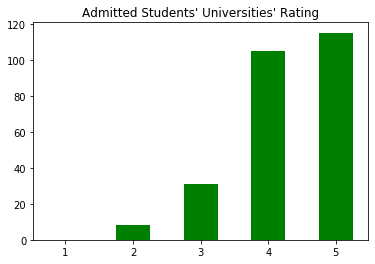

In [6]:
## effect of university rating to admission chance


admitted = df[df["Admitted"]==1]

plt.hist(admitted["University Rating"],bins=range(1,7),rwidth=0.5,histtype="bar",align="left",color ="green")
plt.title("Admitted Students' Universities' Rating")
plt.show()

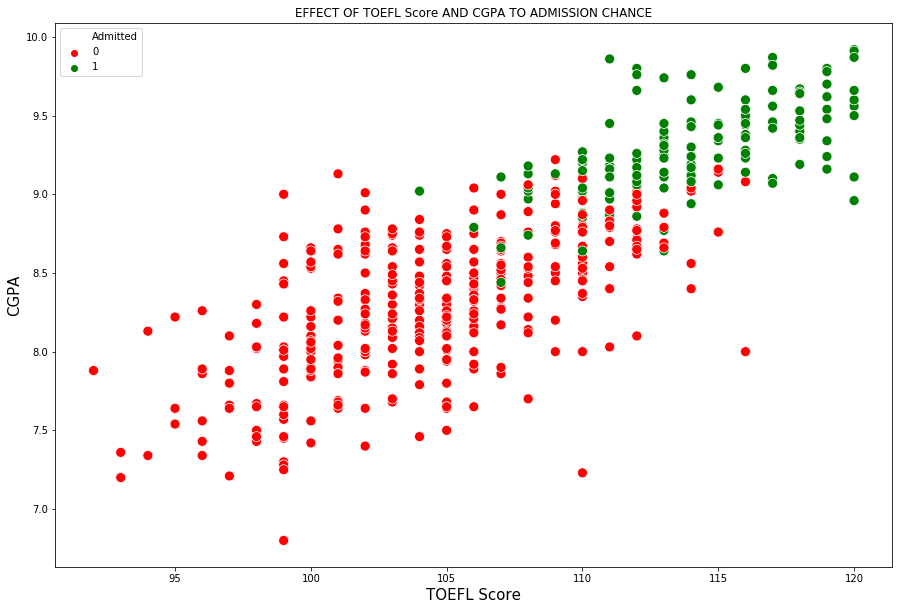

In [7]:
## effect of TOEFL Score and CGPA to admission chance

plt.figure(figsize = (15,10))

ax = sns.scatterplot(x = df["TOEFL Score"],y = df["CGPA"],hue = "Admitted", s= 100,palette = ["red","green"],data = df)

plt.title('EFFECT OF TOEFL Score AND CGPA TO ADMISSION CHANCE')

ax.set_xlabel('TOEFL Score', fontsize=15)
ax.set_ylabel("CGPA", fontsize=15);

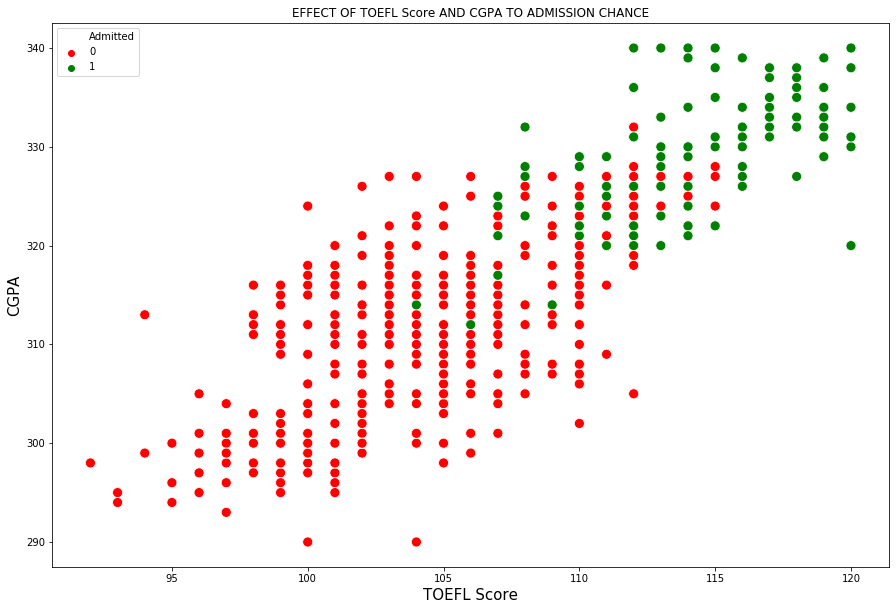

In [8]:
# effect of TOEFL Score and GRE Score to admission chance

fig, ax = plt.subplots(figsize=(15,10))
plt.title('EFFECT OF TOEFL Score AND GRE Score TO ADMISSION CHANCE')
ax = sns.scatterplot(x = df["TOEFL Score"],y = df["GRE Score"],hue = "Admitted", s= 100,palette = ["red","green"],data = df)

plt.title('EFFECT OF TOEFL Score AND CGPA TO ADMISSION CHANCE')

ax.set_xlabel('TOEFL Score', fontsize=15)
ax.set_ylabel("CGPA", fontsize=15);

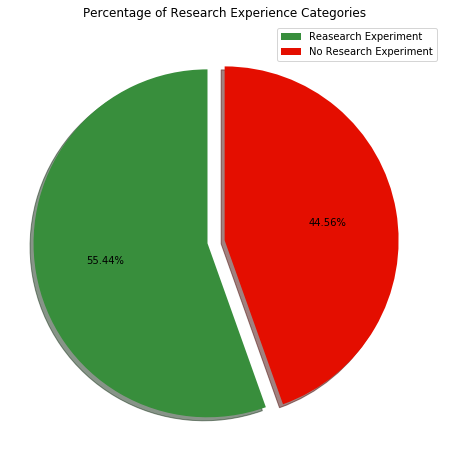

In [9]:
#distribution of Research Experiment

plt.figure(figsize = (15,8))

colors = ['#388E3C', '#E40E00']

sizes = df["Research"].value_counts().tolist()
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode,autopct='%.2f%%', shadow=True, startangle=90,colors = colors)
plt.legend(["Reasearch Experiment","No Research Experiment"])
plt.title("Percentage of Research Experience Categories")
plt.show()

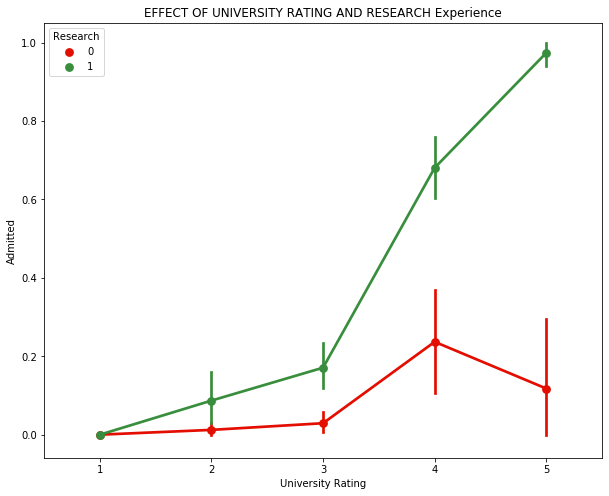

In [10]:
#effect of reseacrh experience with universtiy rating 

plt.figure(figsize = (10,8))

colors = ['#E40E00','#388E3C']

g = sns.pointplot(x = "University Rating",y = "Admitted",hue = "Research",data = df,palette = colors)

g.set_title("EFFECT OF UNIVERSITY RATING AND RESEARCH Experience");

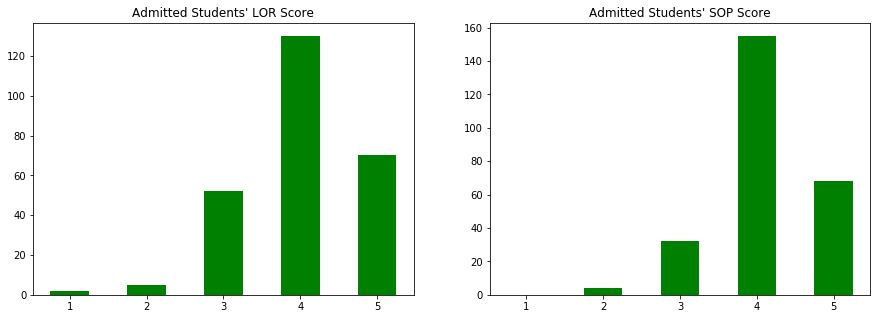

In [11]:
# effect of LOR and SOP to admission chance

plt.figure(figsize = (15,5))

admitted = df[df["Admitted"]==1]

plt.subplot(1,2,1)
plt.hist(admitted["LOR "],bins=range(1,7),rwidth=0.5,histtype="bar",align="left",color ="green")
plt.title("Admitted Students' LOR Score")


plt.subplot(1,2,2)
plt.hist(admitted["SOP"],bins=range(1,7),rwidth=0.5,histtype="bar",align="left",color ="green")
plt.title("Admitted Students' SOP Score");

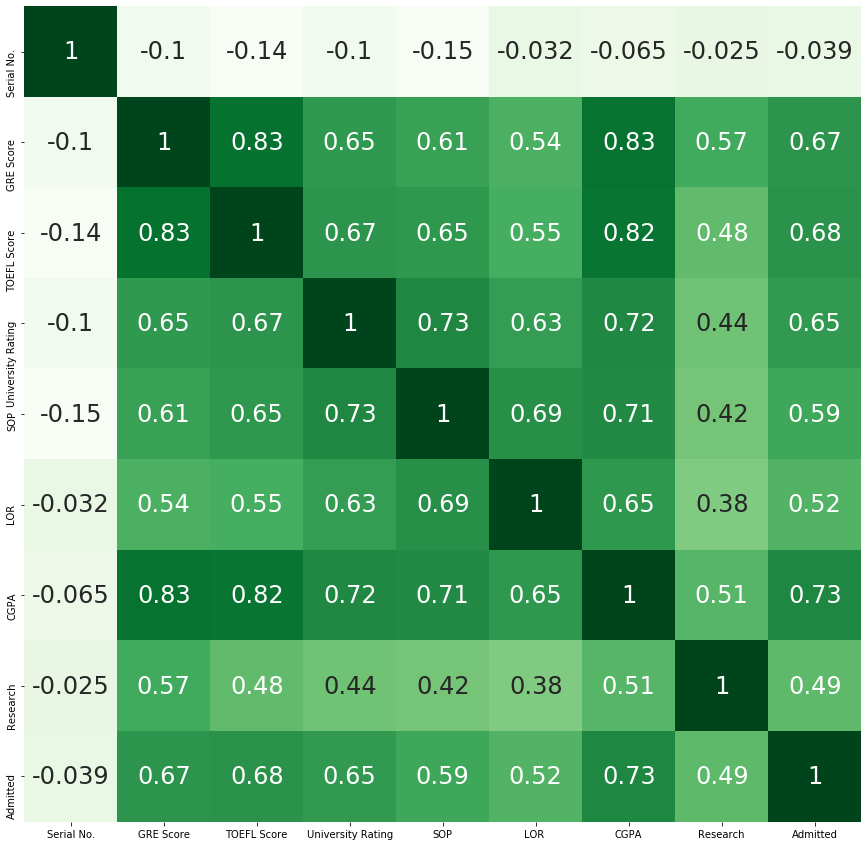

In [12]:
# colleration of dataset

plt.figure(figsize = (15, 15))

corrs = df.corr()

sns.heatmap(corrs,annot=True,cmap="Greens",cbar=False, annot_kws={"size": 24});

## MODELLING

In [13]:
# we deleted Serial No. since it does not affect our data

X_ = df.loc[:,"GRE Score":"Research"]
X_.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [14]:
y = df["Admitted"]

print("Shape of X: ", X_.shape)
print("Shape of y: ",y.shape)

Shape of X:  (900, 7)
Shape of y:  (900,)


In [15]:
#scaling 

X = RobustScaler().fit_transform(X_)

### DECISION TREE

In [16]:
d_tree_model = DecisionTreeClassifier()

In [17]:
#finding best parameters with GridSearchCV 

kfold = 5

d_tree_params = {"max_depth": range(0,25)
              ,"min_samples_split" : range(0,10)
              ,"max_features" : range(1,X.shape[1]+1)}

d_tree_cv_model = GridSearchCV(d_tree_model,d_tree_params,cv = kfold,n_jobs = -1,verbose = 2)

In [18]:
d_tree_cv_model.fit(X,y)

Fitting 5 folds for each of 1750 candidates, totalling 8750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 8353 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 8750 out of 8750 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(0, 25), 'max_features': range(1, 8),

In [19]:
#best parameters
d_tree_cv_model.best_params_

{'max_depth': 17, 'max_features': 1, 'min_samples_split': 2}

In [20]:
#remodelling with best parameters

d_max_depth = d_tree_cv_model.best_params_["max_depth"]

d_max_features = d_tree_cv_model.best_params_["max_features"]

d_min_samples_split = d_tree_cv_model.best_params_["min_samples_split"]

tuned_tree_model = DecisionTreeClassifier(max_depth = d_max_depth,max_features = d_max_features, min_samples_split = d_min_samples_split)

In [21]:
clf = tuned_tree_model.fit(X,y)
y_hat_dt = tuned_tree_model.predict(X)
print(classification_report(y,y_hat_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       641
           1       1.00      1.00      1.00       259

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



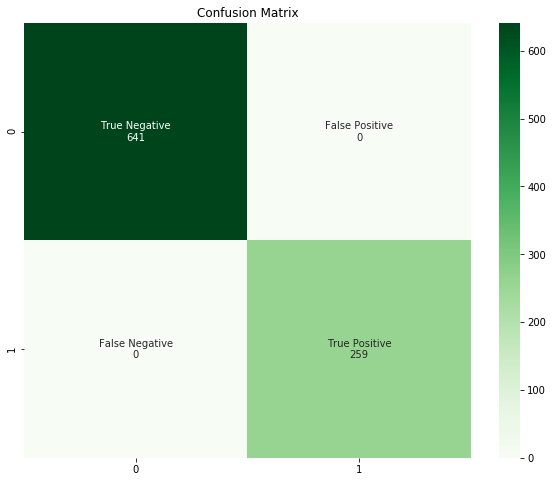

In [22]:
plt.figure(figsize = (10, 8))

conf = confusion_matrix(y, y_hat_dt)

groups = ['True Negative','False Positive','False Negative','True Positive']

plt.title('Confusion Matrix')

group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(groups,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf, annot=labels, fmt="", cmap='Greens')
plt.show()

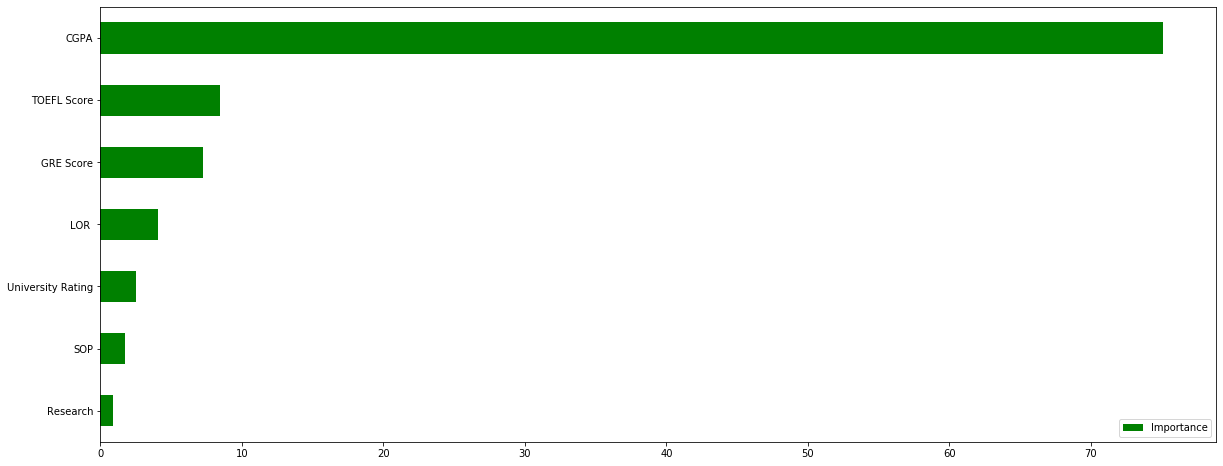

In [23]:
#Importance of our columns
Importance_dt = pd.DataFrame({"Importance": tuned_tree_model.feature_importances_*100},index = X_.columns)

Importance_dt.sort_values(by = "Importance" , ascending = True).plot.barh(color = "g",figsize = (20,8))
plt.show()

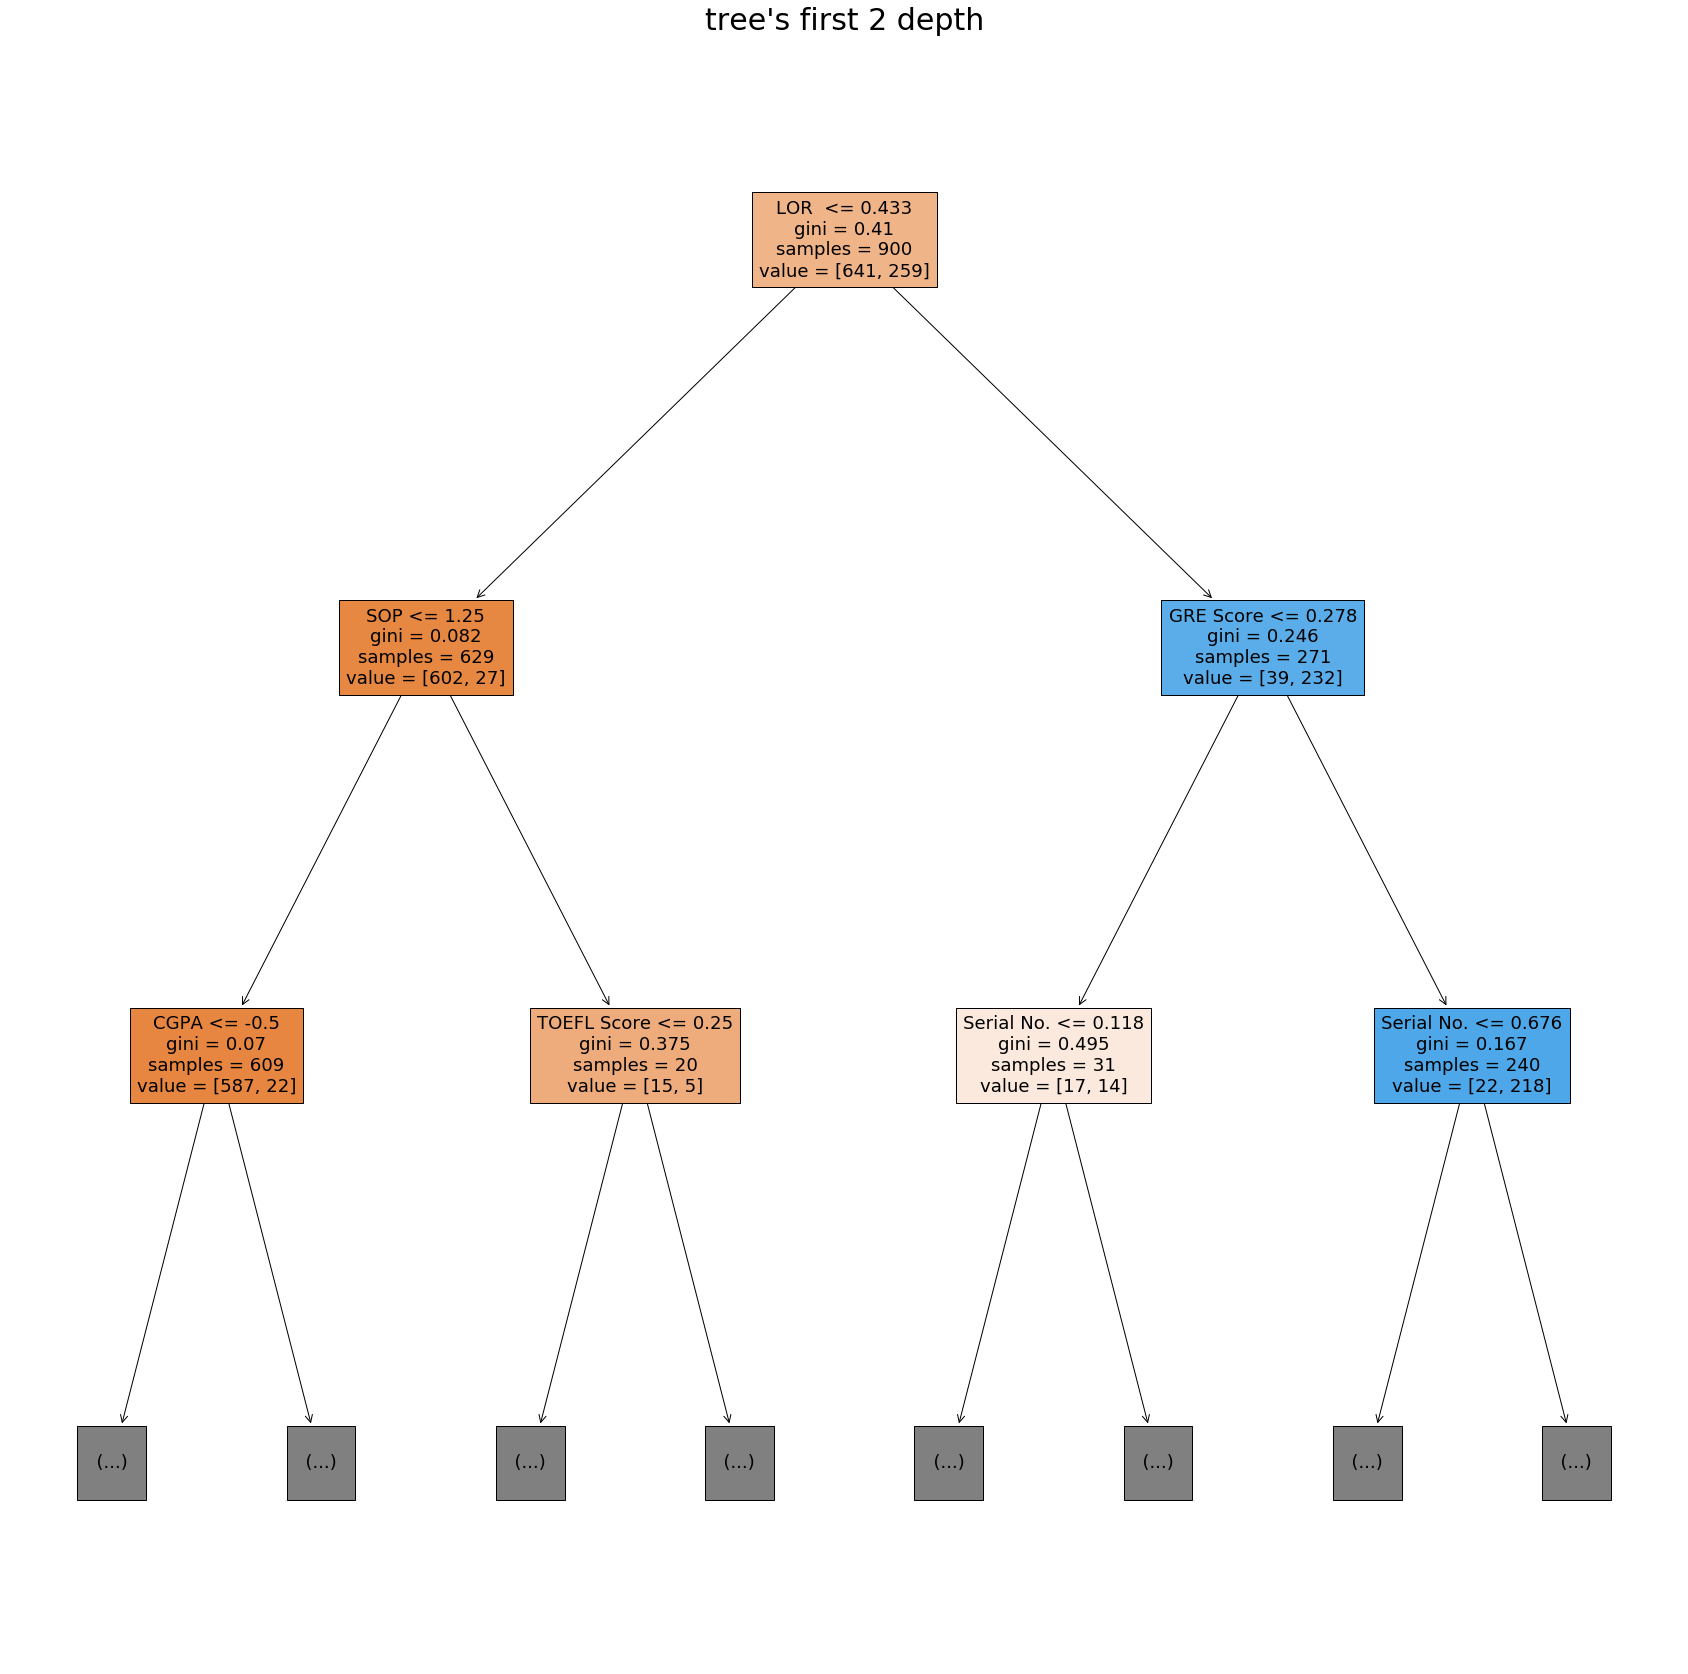

In [24]:
#tree's first 2 depth
plt.figure(figsize = (30,30))
plot_tree(clf,max_depth=2,feature_names=df.columns, filled=True)
plt.title("tree's first 2 depth",fontsize=30)
plt.show()

## RANDOM FOREST

In [25]:
rf_model = RandomForestClassifier()

In [26]:
#finding best parameters with GridSearchCV for Random Forest

rf_params = {"max_depth": range(0,25),
            "max_features": range(1,X.shape[1]+1),
            "n_estimators": range(0,10),
            "min_samples_split":range(0,10)}

rf_cv_model = GridSearchCV(rf_model,rf_params,n_jobs = -1,verbose = 2,cv = kfold)

In [27]:
rf_cv_model.fit(X,y)

Fitting 5 folds for each of 17500 candidates, totalling 87500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 7288 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 20280 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 38392 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 61752 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 87500 out of 87500 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [28]:
#best parameters
rf_cv_model.best_params_

{'max_depth': 12, 'max_features': 1, 'min_samples_split': 2, 'n_estimators': 9}

In [29]:
#remodelling with best parameters

rf_max_features = rf_cv_model.best_params_["max_features"]

rf_min_samples_split = rf_cv_model.best_params_["min_samples_split"]

rf_nestimators = rf_cv_model.best_params_["n_estimators"]

rf_max_depth = rf_cv_model.best_params_["max_depth"]

tuned_rf_model = RandomForestClassifier(max_depth = rf_max_depth,n_estimators = rf_nestimators,max_features = rf_max_features, min_samples_split = rf_min_samples_split)

In [30]:
clf_rf = tuned_rf_model.fit(X,y)
y_hat_rf = tuned_rf_model.predict(X)
print(classification_report(y,y_hat_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       641
           1       1.00      1.00      1.00       259

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



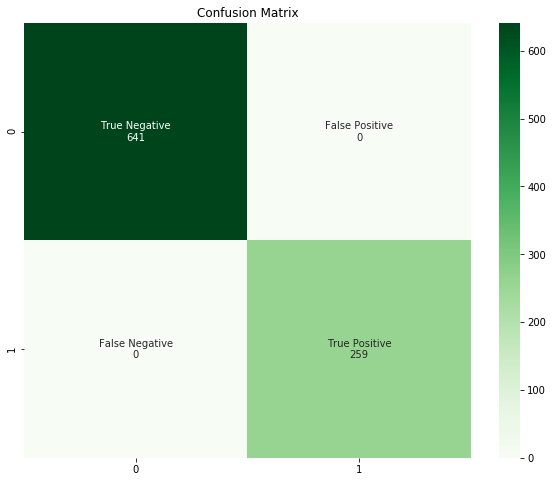

In [31]:
plt.figure(figsize = (10, 8))

conf = confusion_matrix(y, y_hat_rf)

plt.title('Confusion Matrix')

group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(groups,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf, annot=labels, fmt="", cmap='Greens')
plt.show()

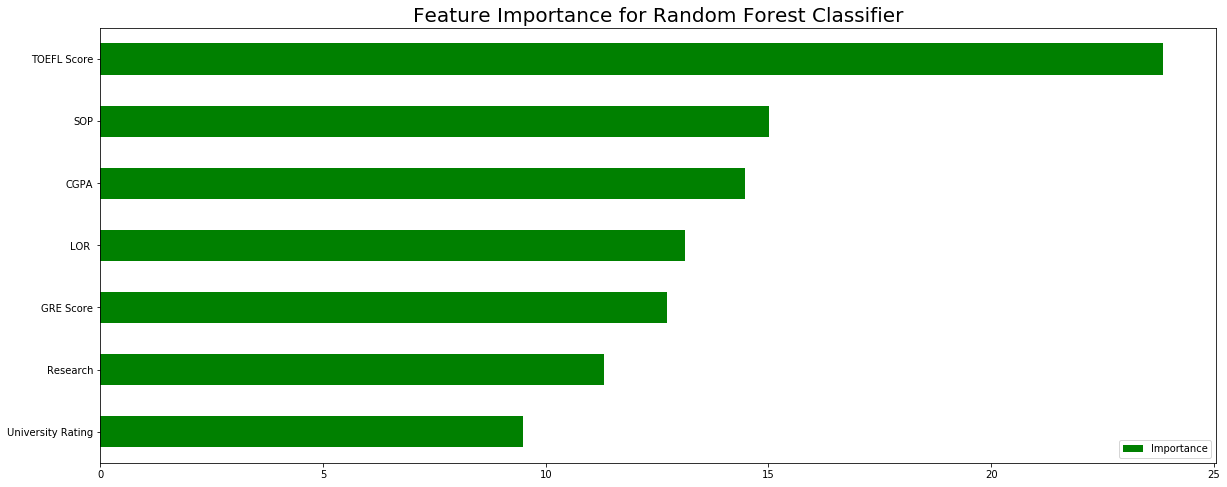

In [32]:
#Importance of our columns

Importance_rf = pd.DataFrame({"Importance": tuned_rf_model.feature_importances_*100},index = X_.columns)

Importance_rf.sort_values(by = "Importance" , ascending = True).plot.barh(color = "g",figsize = (20,8));

plt.title("Feature Importance for Random Forest Classifier",fontsize=20)
plt.show()

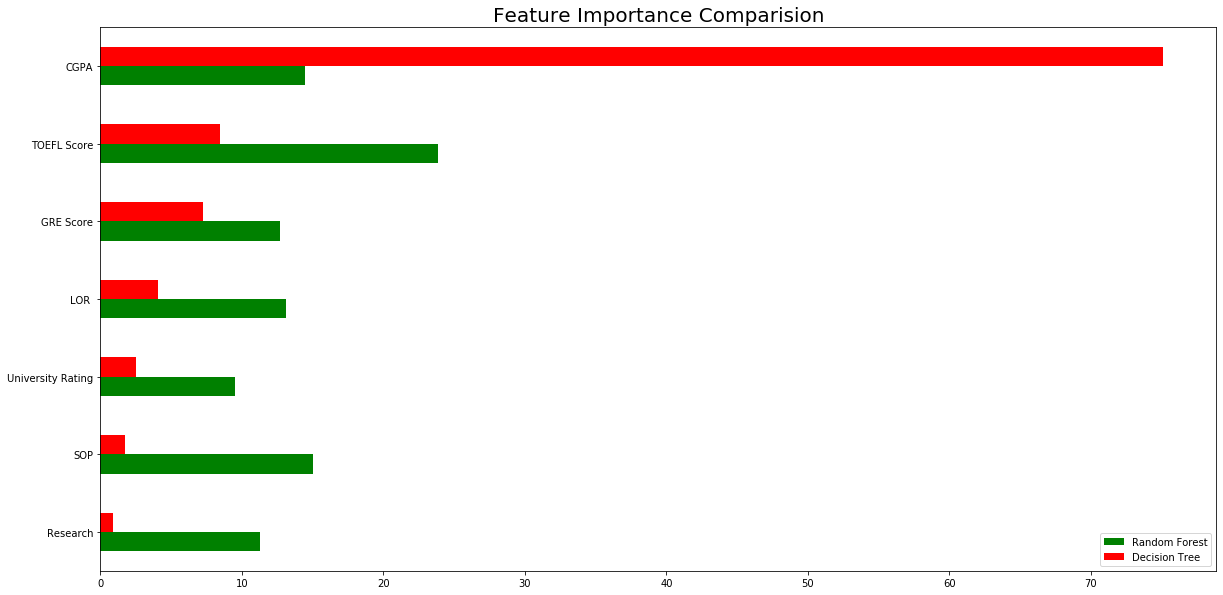

In [33]:
Importance = pd.DataFrame({"Random Forest": tuned_rf_model.feature_importances_*100,
                          "Decision Tree": tuned_tree_model.feature_importances_*100},index = X_.columns)

Importance.sort_values(by = "Decision Tree" , ascending = True).plot.barh(figsize = (20,10),color = ["g","r"]);

plt.title("Feature Importance Comparision",fontsize=20)
plt.show()